# Airy Disk

- 円形開口の平面波を作り (pupa)-> コロナグラフ関数としてFTだけするもの（No coronagraph function）を適用 -> 焦点面を算出(foca)するコード。すなわち単にAiry Diskが出てくる

In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [6]:
import pylab
import matplotlib.pyplot as plt
import numpy as np
import plt_mp #in this ipynb directory

In [7]:
#from fossim/src
import plain_wave as pw
import mask_circular as mc
import no_coronagraph as nc

## 星からの光を作る
星や惑星からの光は、位相のついた平面波で表される。on axisを考えてみよう。

In [8]:
n=1024 # sampling rate at a pupil
pos_star=[0.0,0.0] #angle in unit of lambda/D

## 円形開口マスク
望遠鏡のマスクはpupil to pupil_maskの関数である

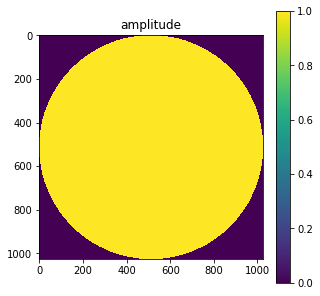

In [9]:
pupa_perfect = pw.wg_plain_wave(n,pos_star)
mask=mc.p2pm_circular(pupa_perfect)
pupa_perfect[mask]=0.0+0.0j
plt_mp.plotpup(pupa_perfect,small=True)

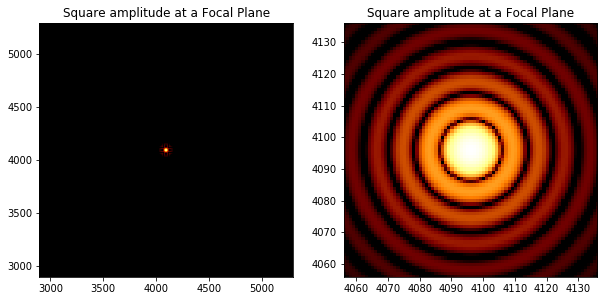

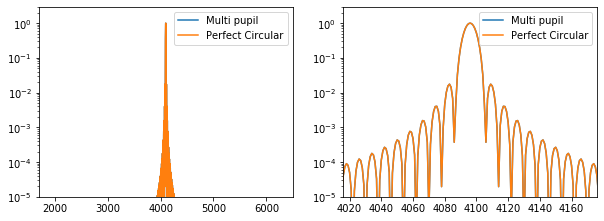

In [10]:
exprat=8 #oversampling factor at a focal plane
foca_perfect = nc.cf_no_coronagraph(pupa_perfect,exprat=exprat)
plt_mp.plotfoc2D(foca_perfect,exprat)
plt_mp.plotfoc1D(foca_perfect,foca_perfect,exprat)

## Multi pupil

In [11]:
pupa = pw.wg_plain_wave(n,pos_star)
Nw=30
dl=1/(Nw+1)
dlt=1/(2*Nw+1)
y=[]
x=[]
for i in range(0,Nw):
    for j in range(0,Nw):
        y.append((i+1)*dl*n)
        x.append((j+1)*dl*n)
x=np.array(x)
y=np.array(y)
maskg=mc.p2pm_circular(pupa,[x,y],n/4*dlt)
masku=mc.p2pm_circular(pupa)


mask=maskg | masku
pupa[mask]=0.0+0.0j

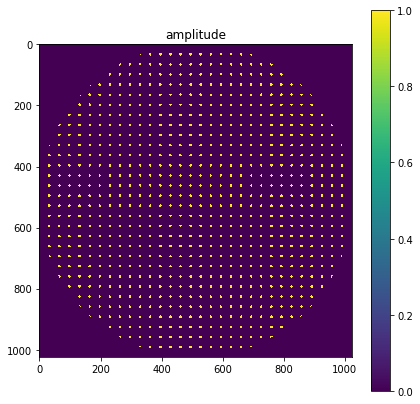

In [12]:
plt_mp.plotpup(pupa,filename="pup_lat.png")

## No coronagraph function = すなわち単にpupil -> focal plane をかけてみる。
- ここでのポイントは単に瞳での配列をFTすると焦点面での分解能は$\lambda/D$程度になってしまうため、コロナグラフ関数設計では、zero-paddingした拡大配列に入れてからFTをすることが基本となる。下のexpratは拡大率。

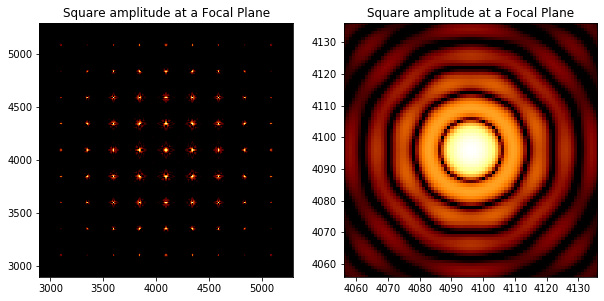

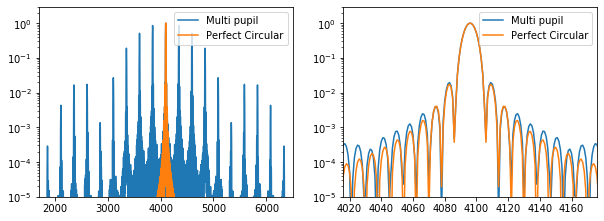

In [13]:
exprat=8 #oversampling factor at a focal plane
foca = nc.cf_no_coronagraph(pupa,exprat=exprat)
plt_mp.plotfoc2D(foca,exprat,filename="foc2d_lat.png")
plt_mp.plotfoc1D(foca,foca_perfect,exprat,filename="foc1d_lat.png")

Airy diskが現われる

## Random

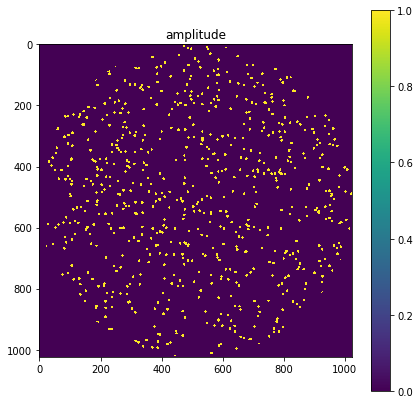

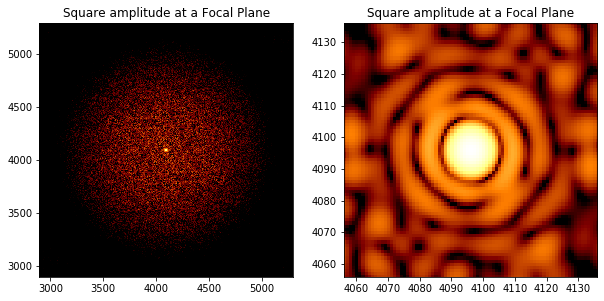

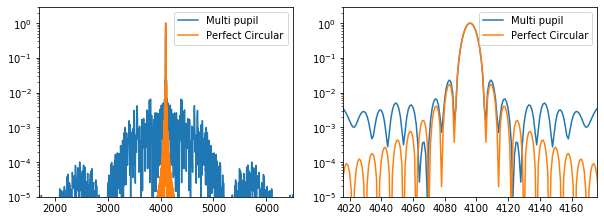

In [10]:
pupa = pw.wg_plain_wave(n,pos_star)
Nw=30
dl=1/(Nw+1)
dlt=1/(2*Nw+1)
maskr=mc.p2pm_circular(pupa,[(np.random.rand(Nw*Nw)*(Nw+1))*dl*n,(np.random.rand(Nw*Nw)*(Nw+1))*dl*n],n/4*dlt)
pupa[maskr]=0.0+0.0j
masku=mc.p2pm_circular(pupa)
mask=maskr | masku
pupa[mask]=0.0+0.0j
plt_mp.plotpup(pupa,filename="pup_rand.png")
exprat=8 #oversampling factor at a focal plane
foca = nc.cf_no_coronagraph(pupa,exprat=exprat)
plt_mp.plotfoc2D(foca,exprat,filename="foc2d_rand.png")

plt_mp.plotfoc1D(foca,foca_perfect,exprat,filename="foc1d_rand.png")

## Gaussian Random 

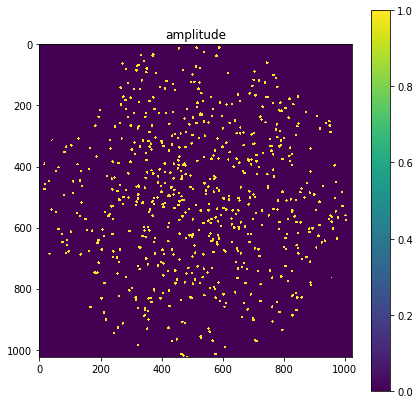

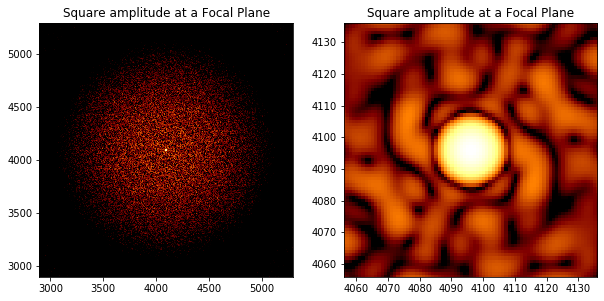

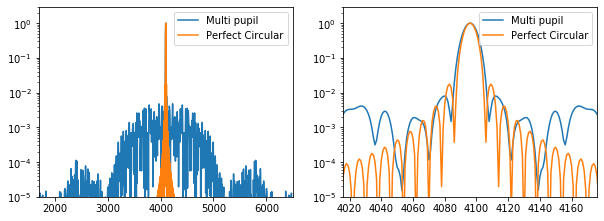

In [11]:
tag="gr"

pupa = pw.wg_plain_wave(n,pos_star)
Nw=30
dl=1/(Nw+1)
dlt=1/(2*Nw+1)
ff=0.3
maskr=mc.p2pm_circular(pupa,[(np.random.normal(0.5,ff,Nw*Nw)*(Nw+1))*dl*n,(np.random.normal(0.5,ff,Nw*Nw)*(Nw+1))*dl*n],n/4*dlt)
pupa[maskr]=0.0+0.0j
masku=mc.p2pm_circular(pupa)
mask=maskr | masku
pupa[mask]=0.0+0.0j

plt_mp.plotpup(pupa,filename="pup_"+tag+".png")
exprat=8 #oversampling factor at a focal plane
foca = nc.cf_no_coronagraph(pupa,exprat=exprat)
plt_mp.plotfoc2D(foca,exprat,filename="foc2d_"+tag+".png")
plt_mp.plotfoc1D(foca,foca_perfect,exprat,filename="foc1d_"+tag+".png")